###Import Library

In [2]:
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

###Load Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Preparing Data

In [4]:
# menentukan path direktori data gambar pelatihan dan pengujian di Google Drive
train_dir = '/content/drive/MyDrive/DeepLearning_VGG16/train'
test_dir = '/content/drive/MyDrive/DeepLearning_VGG16/test'

In [5]:
# Pre-processing data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 500 images belonging to 2 classes.


In [6]:
# Pre-processing data
test_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224), #ukuran gambar yang diharapkan
    batch_size=32,
    class_mode='binary'
)

Found 40 images belonging to 2 classes.


###Modelling VGG16

In [7]:
# Membangun model sequential
model = Sequential()

# Layer konvolusi pertama
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Layer konvolusi kedua
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Layer konvolusi ketiga
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Layer konvolusi keempat
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Layer konvolusi kelima
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Mengubah hasil konvolusi menjadi vektor
model.add(Flatten())

# Fully connected layer
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))

# Output layer
model.add(Dense(2, activation='softmax'))


###Train Model

In [8]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [9]:
# Menampilkan ringkasan model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint
# definisikan callback ModelCheckpoint
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)
hist = model.fit(
    train_data,
    epochs=10,
    verbose=1,
    steps_per_epoch=5,
    validation_steps=10,
    validation_data=test_data,
)

Epoch 1/10
3/5 [=================>............] - ETA: 4s - loss: 3.2938 - accuracy: 0.5521

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


5/5 [==============================] - ETA: 0s - loss: 2.9663 - accuracy: 0.5405

5/5 [==============================] - 74s 10s/step - loss: 2.9663 - accuracy: 0.5405 - val_loss: 0.6974 - val_accuracy: 0.5000
Epoch 2/10
5/5 [==============================] - 17s 3s/step - loss: 0.6946 - accuracy: 0.5068
Epoch 3/10
5/5 [==============================] - 10s 2s/step - loss: 0.6940 - accuracy: 0.4500
Epoch 4/10
5/5 [==============================] - 8s 1s/step - loss: 0.6933 - accuracy: 0.5135
Epoch 5/10
5/5 [==============================] - 6s 1s/step - loss: 0.6931 - accuracy: 0.5125
Epoch 6/10
5/5 [==============================] - 6s 1s/step - loss: 0.6945 - accuracy: 0.4563
Epoch 7/10
5/5 [==============================] - 4s 818ms/step - loss: 0.6930 - accuracy: 0.5135
Epoch 8/10
5/5 [==============================] - 4s 887ms/step - loss: 0.6938 - accuracy: 0.4730
Epoch 9/10
5/5 [==============================] - 5s 733ms/step - loss: 0.6938 - accuracy: 0.4812
Epoch 10/10
5/5 [==============================] - 3s 561ms/step - loss: 0.6932 - accuracy: 0.4527


###Save Model

In [11]:
model.save('best_model.h5')

###Visualisasi Loss dan Accuracy

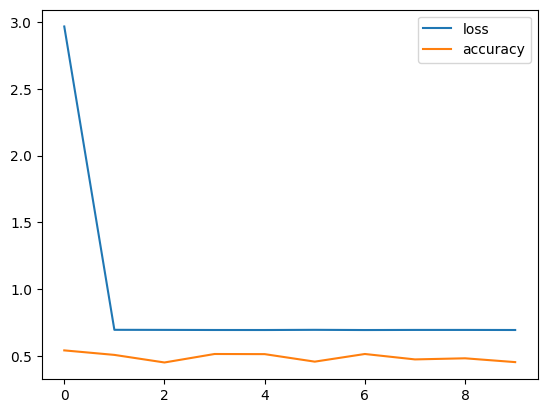

<Figure size 640x480 with 0 Axes>

In [12]:
# Visualisasi Loss dan Akurasi
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['accuracy'], label='accuracy')
plt.legend()
plt.show()
plt.savefig('Loss_Acc')

In [13]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [14]:
class_name = list(train_data.class_indices.keys())
class_name

['bike', 'car']

1/1 [==============================] - 0s 28ms/step


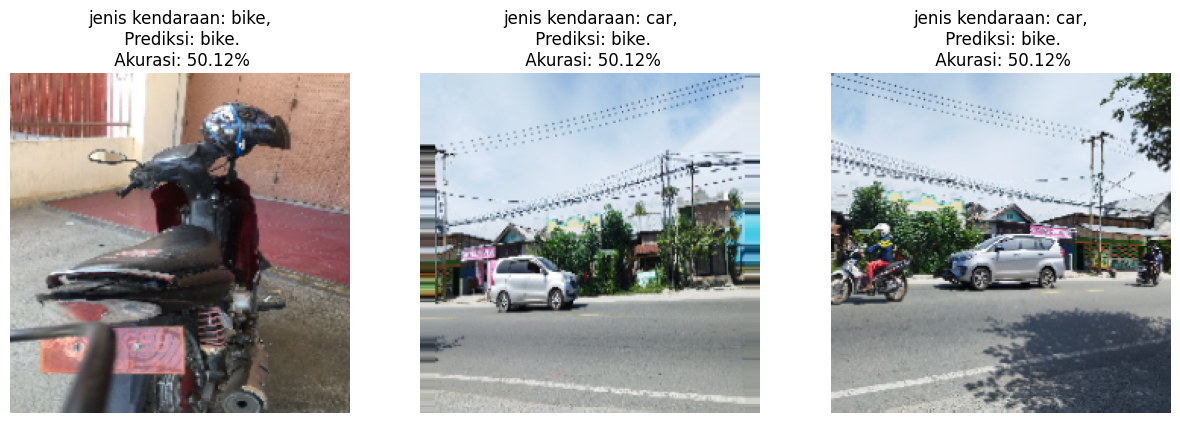

In [15]:
#Menampilkan gambar dan prediksi
import numpy as np

plt.figure(figsize=(15, 15))

for images, labels in test_data:
    for i in range(3):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_name[int(labels[i])] 
        plt.title(f"jenis kendaraan: {actual_class},\n Prediksi: {predicted_class}.\n Akurasi: {confidence}%")
        plt.axis("off")
    break

##**Model Predict**

####Load Model

In [17]:
from keras.models import load_model
import cv2
import numpy as np

model = load_model('best_model.h5')

####Prediksi Image

Saving motor2.jpg to motor2.jpg
1/1 [==============================] - 0s 19ms/step
Predicted class: bike


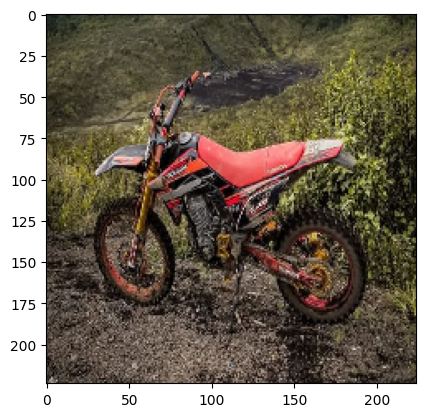

In [25]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = load_img(path, target_size = (224,224))
    imgplot = plt.imshow(img)
    x = img_to_array(img)
    x = np.expand_dims(x, axis = 0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size = 100)

        # Print prediction result
    predicted_class_index = np.argmax(classes)
    class_names = ['bike', 'car'] 
    predicted_class = class_names[predicted_class_index]

    print('Predicted class:', predicted_class)